In [42]:
import SimpleITK as sitk
import numpy as np
from glob import glob
import pandas as pd

_sid = "1.3.6.1.4.1.14519.5.2.1.6279.6001.100225287222365663678666836860"
file = "1.3.6.1.4.1.14519.5.2.1.6279.6001.100225287222365663678666836860.mhd"
root = "/home/maling/fanqiliang/lung16/LUNG16"
csv =  "/home/maling/fanqiliang/lung16/CSVFILES/annotations.csv"

dt = pd.read_csv(csv)
dt = dt[dt["seriesuid"] == _sid]

sid = dt["seriesuid"]
x = dt["coordX"].values
y = dt["coordY"].values
z = dt["coordZ"].values
d = dt["diameter_mm"].values
idx = 0

_x, _y, _z = x[idx], y[idx], z[idx]
print(_x, _y, _z)
import os

img = sitk.ReadImage(glob(os.path.join(root, "**", file), recursive=True)[0])
print(glob(os.path.join(root, "**", file), recursive=True)[0])
i, j, k = img.TransformPhysicalPointToIndex([_x, _y, _z])

print(i, j, k)

arr = sitk.GetArrayFromImage(img)
print(arr.shape)
print(img.GetSpacing())
print(d[idx])

-128.6994211 -175.3192718 -298.3875064
/home/maling/fanqiliang/lung16/LUNG16/subset8/1.3.6.1.4.1.14519.5.2.1.6279.6001.100225287222365663678666836860.mhd
45 212 78
(194, 512, 512)
(0.64453125, 0.64453125, 1.7999999523162842)
5.651470635


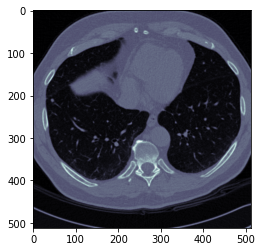

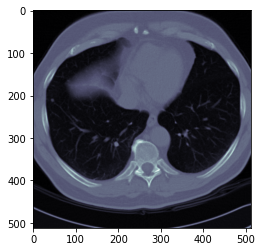

In [43]:
import matplotlib.pyplot as plt

plt.figure()
plt.imshow(arr[k-1], cmap="bone")
# plt.imshow(np.mean(arr[i-10:i+10], axis=0), cmap="bone")
plt.show()

plt.figure()
plt.imshow(arr[k], cmap="bone")
# plt.imshow(np.mean(arr[i-10:i+10], axis=0), cmap="bone")
plt.show()

plt.figure()
plt.imshow(arr[k+1], cmap="bone")
# plt.imshow(np.mean(arr[i-10:i+10], axis=0), cmap="bone")
plt.show()

plt.figure()
plt.imshow(np.mean(arr[k-2:k+3], axis=0), cmap="bone")
plt.show()